In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [94]:
df = pd.read_csv('/content/drive/MyDrive/khdl/luxury_watches_preprocessed.csv')
df.head()

,Brand,Model,Case Material,Strap Material,Movement Type,Water Resistance,Case Diameter,Case Thickness,Band Width,Dial Color,Crystal Material,Complications,Power Reserve,Price,Complication_Score
0,Rolex,Submariner,Stainless Steel,Stainless Steel,Automatic,300,40.0,13.00,20.0,Black,Sapphire,['Date'],48.0,9500.0,1
1,Omega,Seamaster,Titanium,Rubber,Automatic,600,43.5,14.47,21.0,Blue,Sapphire,['Date'],60.0,5800.0,1
2,Tag Heuer,Carrera,Stainless Steel,Leather,Automatic,100,41.0,13.00,20.0,White,Sapphire,['Chronograph'],42.0,4200.0,3
3,Breitling,Navitimer,Stainless Steel,Stainless Steel,Automatic,30,43.0,14.25,22.0,Black,Sapphire,['Chronograph'],70.0,7900.0,3
4,Cartier,Tank Solo,Stainless Steel,Leather,Quartz,30,31.0,6.05,20.0,Silver,Sapphire,['None'],55.0,2800.0,0


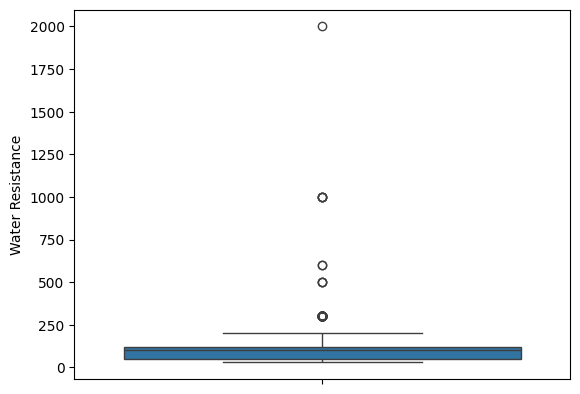

In [95]:
sns.boxplot(df['Water Resistance'])
plt.show()

In [96]:
num_columns = ['Water Resistance', 'Case Diameter', 'Case Thickness', 'Band Width', 'Power Reserve', 'Complication_Score', 'Price']

In [97]:
def clip_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column_name] = np.clip(df[column_name], lower_bound, upper_bound)
    return df

In [98]:
for col in num_columns:
    df = clip_outliers(df, col)

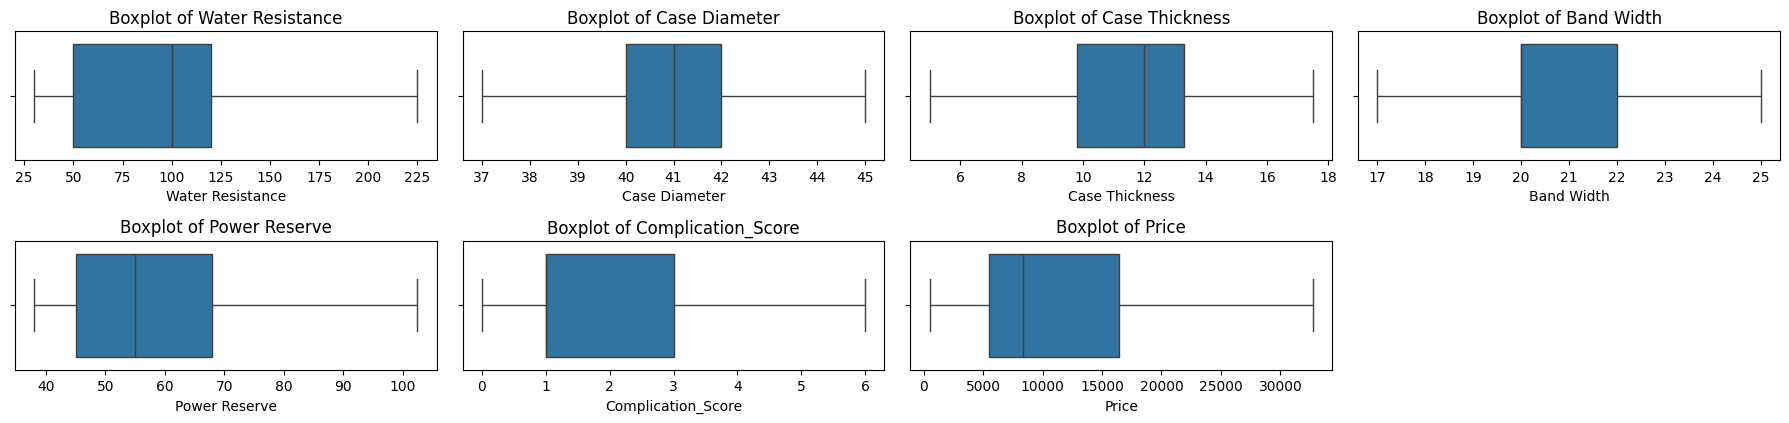

In [99]:
num_plots = len(num_columns)
n_rows = (num_plots // 3) + (num_plots % 3 > 0)
fig, axes = plt.subplots(n_rows, 4, figsize=(18, 6))
for i, col in enumerate(num_columns):
    row = i // 4
    col_idx = i % 4
    sns.boxplot(x=df[col], ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Boxplot of {col}')
    axes[row, col_idx].set_xlabel(col)

for ax in axes.flatten()[num_plots:]:
    ax.set_visible(False)
plt.tight_layout()
plt.show()

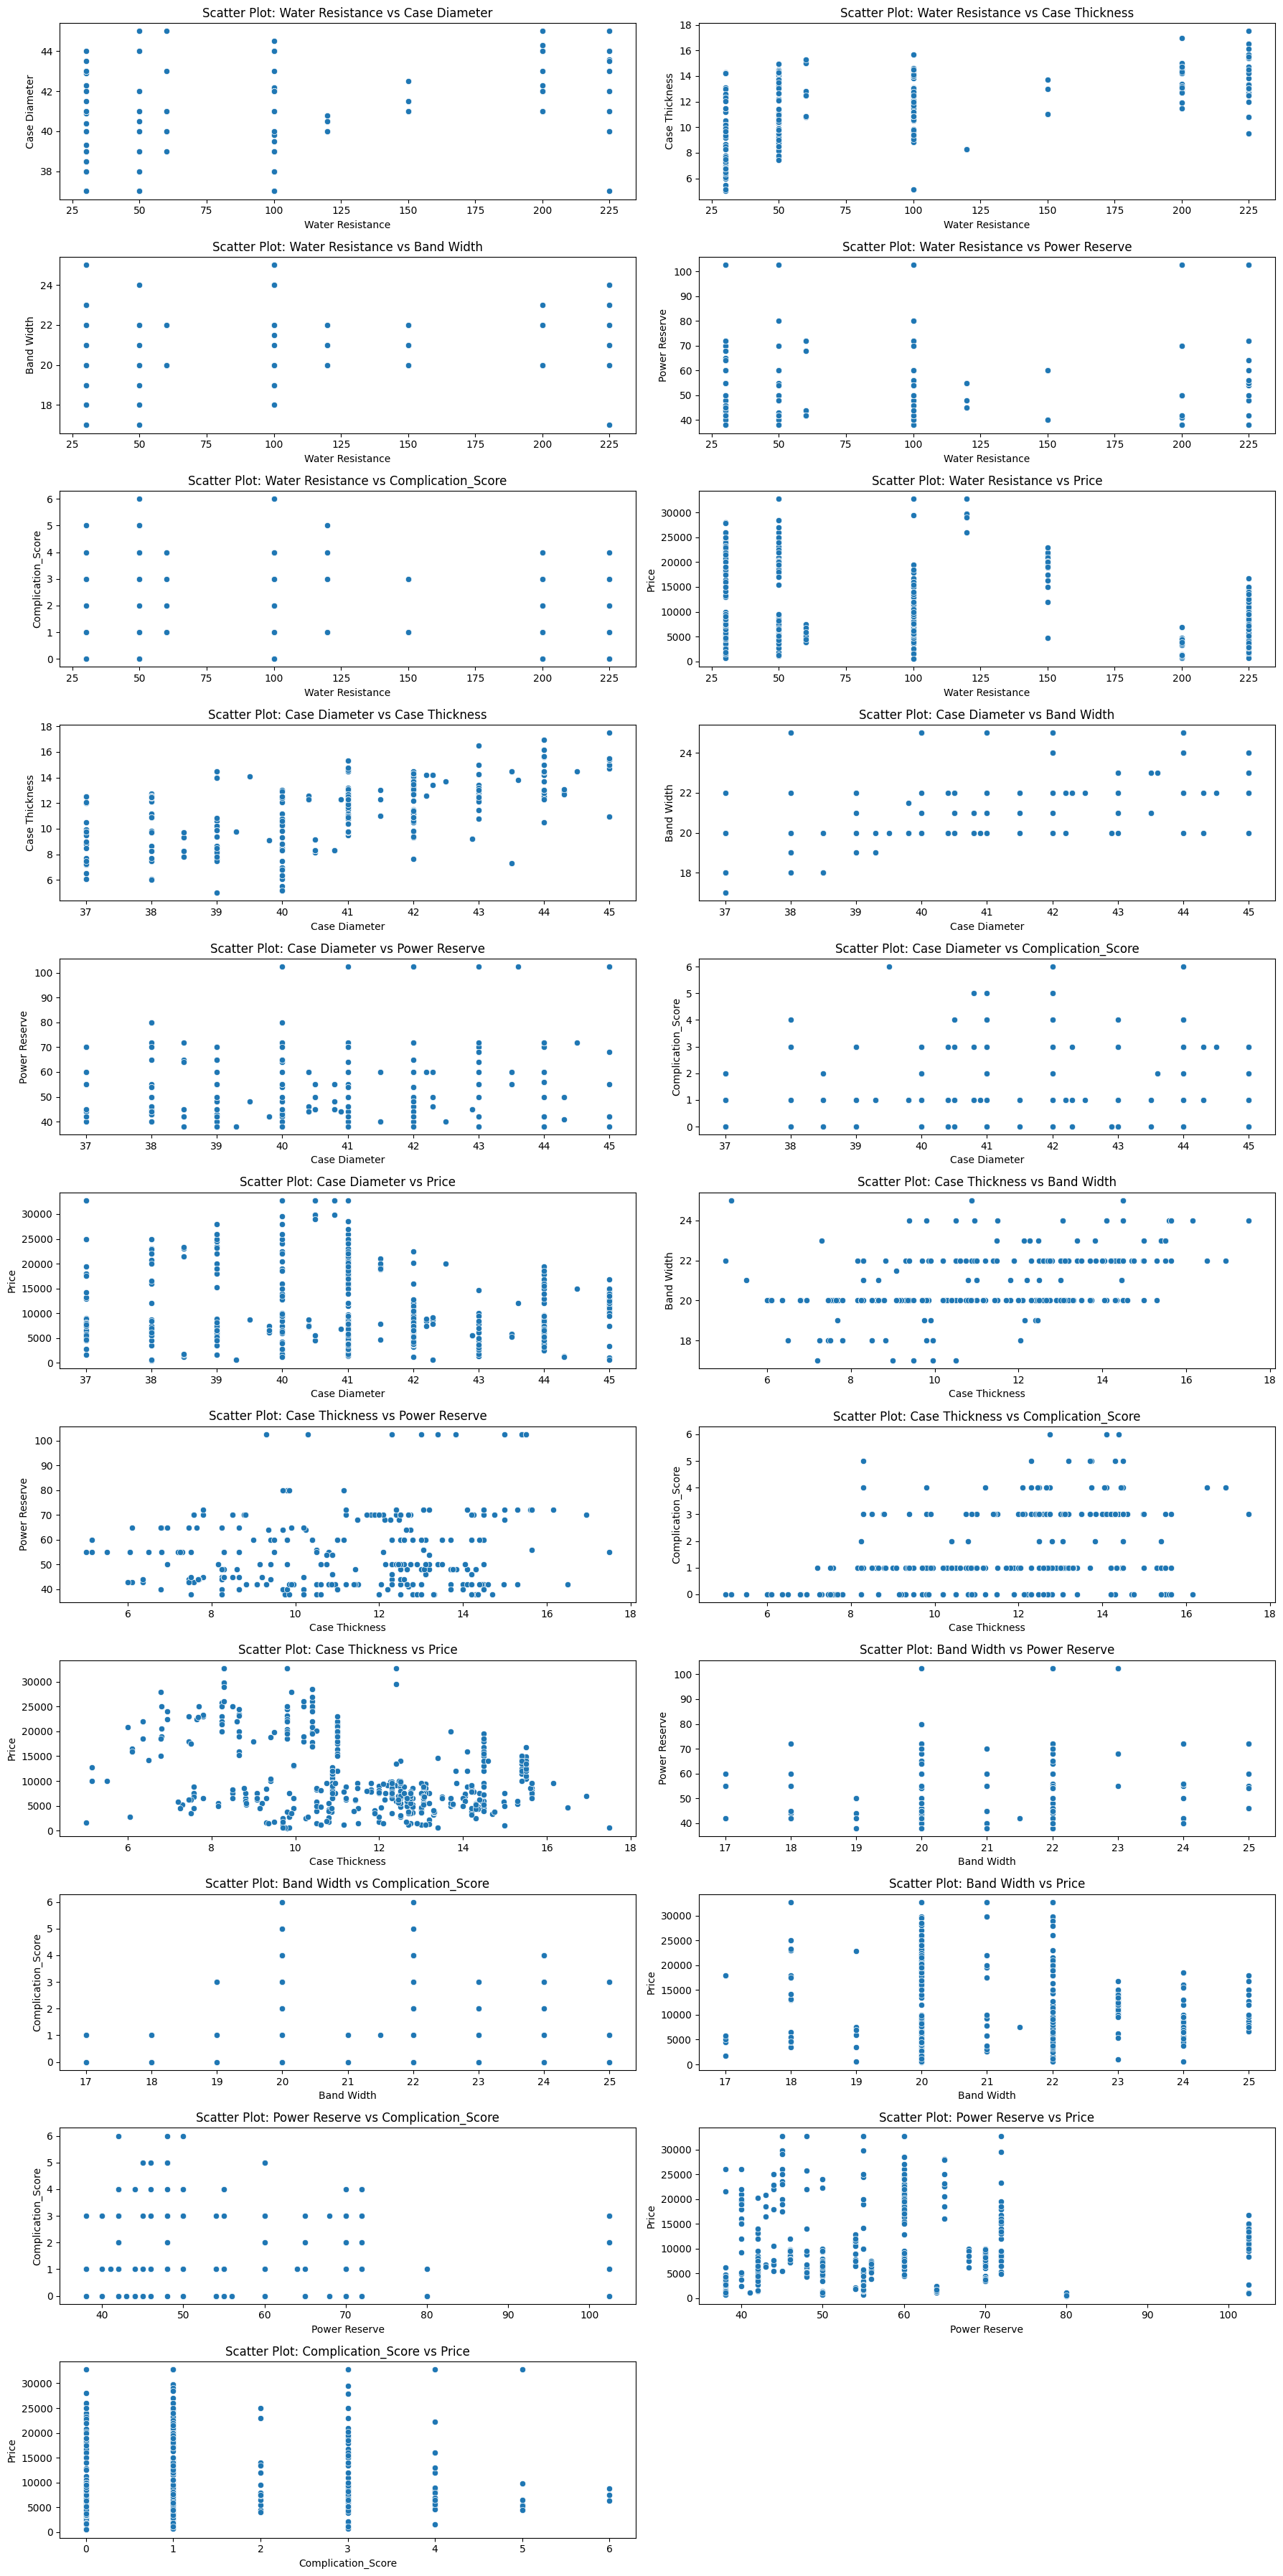

In [100]:
num_plots = len(num_columns) * (len(num_columns) - 1) // 2

n_rows = (num_plots // 2) + (num_plots % 2 > 0)
n_cols = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18,36))

if n_rows == 1:
    axes = axes.reshape(1, 2)

plot_idx = 0
for i in range(len(num_columns)):
    for j in range(i + 1, len(num_columns)):
        x_col = num_columns[i]
        y_col = num_columns[j]
        row = plot_idx // n_cols
        col_idx = plot_idx % n_cols
        sns.scatterplot(x=df[x_col], y=df[y_col], ax=axes[row, col_idx])
        axes[row, col_idx].set_title(f'Scatter Plot: {x_col} vs {y_col}')
        axes[row, col_idx].set_xlabel(x_col)
        axes[row, col_idx].set_ylabel(y_col)
        plot_idx += 1

for ax in axes.flatten()[plot_idx:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

In [101]:
# for col in num_columns:
#     print(f"\nColumn: {col}")
#     print(df[col].describe())

In [102]:
df['Price'].describe()

,Price
count,507.000000
mean,11469.487179
std,8360.300393
min,495.000000
25%,5500.000000
50%,8350.000000
75%,16400.000000
max,32750.000000


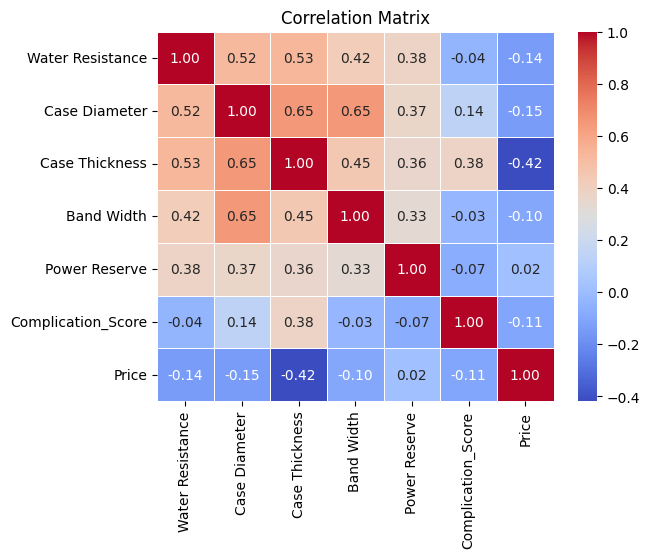

In [103]:
numeric_df = df[num_columns]
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [104]:
df['Price'].describe()

,Price
count,507.000000
mean,11469.487179
std,8360.300393
min,495.000000
25%,5500.000000
50%,8350.000000
75%,16400.000000
max,32750.000000


In [105]:
cat_columns = ['Case Material', 'Strap Material', 'Movement Type', 'Dial Color', 'Crystal Material']

In [106]:
# for col in cat_columns:
#     print(f"\nColumn: {col}")
#     print(df[col].value_counts())

In [107]:
case_material_score = {
    'Platinum': 5, 'Rose Gold': 5, 'White Gold': 5, 'Yellow Gold': 5,
    'Titanium': 4, 'Carbon Fiber': 4, 'Ceramic': 4,
    'Stainless Steel': 2, 'Bronze': 3
}
strap_material_score = {
    'Gold': 5, 'Titanium': 4, 'Leather': 4,
    'Rubber': 3, 'Fabric': 2, 'NATO': 2, 'Stainless Steel': 2
}
crystal_material_score = {
    'Sapphire': 5, 'Non-Sapphire': 2
}
df['Luxury_Index'] = (
    df['Case Material'].map(case_material_score).fillna(1) +
    df['Strap Material'].map(strap_material_score).fillna(1) +
    df['Crystal Material'].map(crystal_material_score).fillna(2) +
    df['Complication_Score']
)

def classify_movement(movement):
    movement = movement.lower()
    if 'automatic' in movement or 'manual' in movement:
        return 1
    else:
        return 0

df['Movement_Complexity'] = df['Movement Type'].apply(classify_movement)

df['Case_Proportion'] = df['Case Diameter'] / (df['Case Thickness'] + 1e-5)

dial_color_score = {
    'Blue': 5,
    'White': 4,
    'Black': 3,
    'Silver': 3,
    'Others': 2
}
df['Dial_Score'] = df['Dial Color'].map(dial_color_score).fillna(2)

df['Material_Match'] = (df['Case Material'] == df['Strap Material']).astype(int)

def water_tier(water_resistance):
    if water_resistance <= 50:
        return 'Basic'
    elif water_resistance <= 150:
        return 'Standard'
    else:
        return 'Professional'

df['Water_Tier'] = df['Water Resistance'].apply(water_tier)

very_high_end = [
    'Patek Philippe', 'Audemars Piguet', 'Vacheron Constantin', 'A. Lange & Söhne', 'A. Lange & Sohne'
]
high_end = [
    'Rolex', 'Breguet', 'Jaeger-LeCoultre', 'Blancpain', 'IWC', 'Girard-Perregaux', 'Omega'
]
mid_range = [
    'Cartier', 'Breitling', 'Hublot', 'Panerai', 'Chopard', 'Tudor', 'Tag Heuer', 'TAG Heuer',
    'Longines', 'Ulysse Nardin', 'Montblanc', 'Seiko', 'Bell & Ross', 'Oris'
]

def brand_tier(brand):
    if brand in very_high_end:
        return 'Very High-End'
    elif brand in high_end:
        return 'High-End'
    elif brand in mid_range:
        return 'Mid-Range'
    else:
        return 'Other'

df['Brand_Tier'] = df['Brand'].apply(brand_tier)

def case_size_category(diameter):
    if diameter < 36:
        return 0
    elif diameter <= 40:
        return 1
    else:
        return 2
df['Case_Size_Category'] = df['Case Diameter'].apply(case_size_category)

df['Has_Complication'] = (df['Complication_Score'] > 0).astype(int)

In [108]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()

df['Brand_Tier_encoded'] = label_enc.fit_transform(df['Brand_Tier'])
df['Water_Tier_encoded'] = label_enc.fit_transform(df['Water_Tier'])


In [109]:
df = pd.get_dummies(df, columns=['Brand_Tier', 'Water_Tier'], drop_first=True)

In [110]:
df.columns

Index(['Brand', 'Model', 'Case Material', 'Strap Material', 'Movement Type',
       'Water Resistance', 'Case Diameter', 'Case Thickness', 'Band Width',
       'Dial Color', 'Crystal Material', 'Complications', 'Power Reserve',
       'Price', 'Complication_Score', 'Luxury_Index', 'Movement_Complexity',
       'Case_Proportion', 'Dial_Score', 'Material_Match', 'Case_Size_Category',
       'Has_Complication', 'Brand_Tier_encoded', 'Water_Tier_encoded',
       'Brand_Tier_Mid-Range', 'Brand_Tier_Other', 'Brand_Tier_Very High-End',
       'Water_Tier_Professional', 'Water_Tier_Standard'],
      dtype='object')

In [115]:
df['Brand_Case'] = df['Brand_Tier_encoded'] * df['Case_Proportion']
df['Brand_Crystal'] = df['Brand_Tier_encoded'] * (df['Crystal Material'].apply(lambda x: 1 if x == 'Sapphire' else 0))
df['Material_Crystal_Movement'] = df['Material_Match'] + (df['Crystal Material'].apply(lambda x: 1 if x == 'Sapphire' else 0)) + df['Movement_Complexity']

new_cols = ['Brand_Case', 'Brand_Crystal', 'Material_Crystal_Movement']
df[new_cols + ['Price']].corr()['Price']


,Price
Brand_Case,0.580539
Brand_Crystal,0.526944
Material_Crystal_Movement,0.386074
Price,1.000000


In [ ]:
df['Dial_Score'].value_counts()

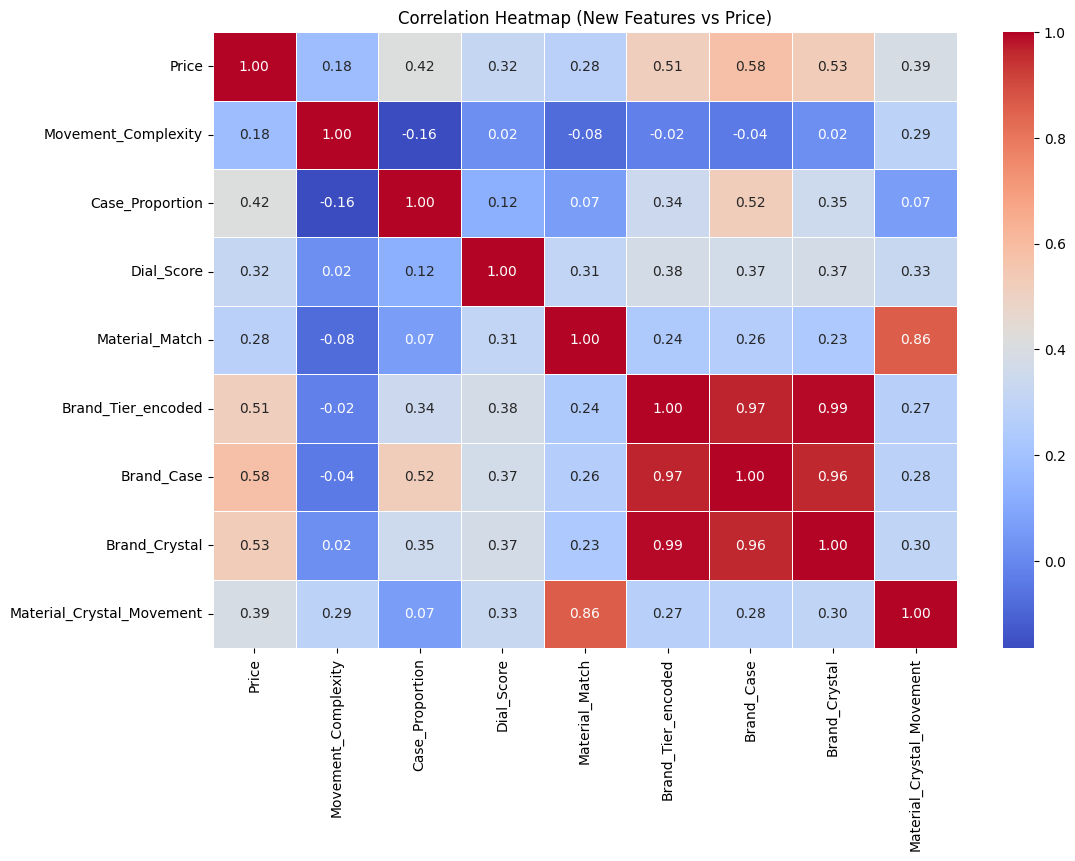

In [116]:
correlation_cols = [
    'Price', 'Movement_Complexity',
    'Case_Proportion', 'Dial_Score', 'Material_Match',
    'Brand_Tier_encoded', 'Brand_Case', 'Brand_Crystal', 'Material_Crystal_Movement'
]

corr_matrix = df[correlation_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap (New Features vs Price)')
plt.show()


In [117]:
df.columns

Index(['Brand', 'Model', 'Case Material', 'Strap Material', 'Movement Type',
       'Water Resistance', 'Case Diameter', 'Case Thickness', 'Band Width',
       'Dial Color', 'Crystal Material', 'Complications', 'Power Reserve',
       'Price', 'Complication_Score', 'Luxury_Index', 'Movement_Complexity',
       'Case_Proportion', 'Dial_Score', 'Material_Match', 'Case_Size_Category',
       'Has_Complication', 'Brand_Tier_encoded', 'Water_Tier_encoded',
       'Brand_Tier_Mid-Range', 'Brand_Tier_Other', 'Brand_Tier_Very High-End',
       'Water_Tier_Professional', 'Water_Tier_Standard', 'Brand_Case',
       'Brand_Crystal', 'Material_Crystal', 'Material_Crystal_Movement'],
      dtype='object')

In [ ]:
print(abc)

In [124]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df[[
    'Case_Proportion', 'Brand_Case', 'Brand_Crystal',
    'Material_Crystal', 'Material_Crystal_Movement', 'Brand_Tier_encoded', 'Material_Match'
]]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print("Train R^2:", model.score(X_train, y_train))
print("Test R^2:", model.score(X_test, y_test))

Train R^2: 0.4332922204791383
Test R^2: 0.476256327167087


In [ ]:
df.to_csv('/content/drive/MyDrive/khdl/luxury_watches_featured.csv', index=False)

In [118]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import GridSearchCV

R2 Score: 0.7597
RMSE: 3481.9236


<Figure size 800x600 with 0 Axes>

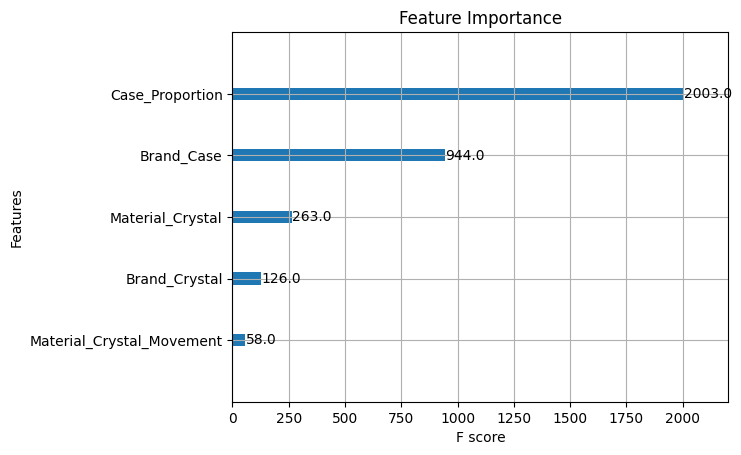

In [119]:
X = df[[
    'Case_Proportion', 'Brand_Case', 'Brand_Crystal',
    'Material_Crystal', 'Material_Crystal_Movement'
]]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = xgb.XGBRegressor(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'R2 Score: {r2:.4f}')
print(f'RMSE: {rmse:.4f}')

plt.figure(figsize=(8,6))
xgb.plot_importance(model, importance_type='weight')
plt.title('Feature Importance')
plt.show()


In [ ]:
X = df[['Luxury_Index', 'Brand_Tier_encoded', 'Dial_Score', 'Case_Proportion', 'Has_Power_Reserve', 'Material_Match', 'Has_Complication', 'Case_Size_Category']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = xgb.XGBRegressor(
    n_estimators=1000,
    max_depth=6,
    learning_rate=0.01,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'R2 Score: {r2:.4f}')
print(f'RMSE: {rmse:.4f}')

plt.figure(figsize=(8,6))
xgb.plot_importance(model, importance_type='weight')
plt.title('Feature Importance')
plt.show()


In [ ]:
scorer = make_scorer(r2_score)

xgb_model = xgb.XGBRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring=scorer, cv=3, n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best R2 Score: {grid_search.best_score_:.4f}')

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Tuned R2 Score: {r2:.4f}')
print(f'Tuned RMSE: {rmse:.4f}')

plt.figure(figsize=(8,6))
xgb.plot_importance(best_model, importance_type='weight')
plt.title('Feature Importance (Tuned Model)')
plt.show()


In [ ]:
!pip install catboost

In [ ]:
import catboost
from catboost import CatBoostRegressor

In [ ]:
X = df.drop(columns=['Complications', 'Price'])
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_columns = [
    'Brand', 'Model', 'Case Material', 'Strap Material', 'Movement Type',
    'Dial Color', 'Crystal Material'
]

categorical_columns = X.select_dtypes(include='object').columns.tolist()

model = CatBoostRegressor(iterations=200, depth=6, learning_rate=0.1, loss_function='RMSE', cat_features=categorical_columns)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'R2 Score: {r2:.4f}')
print(f'RMSE: {rmse:.4f}')


In [ ]:
param_grid = {
    'iterations': [200, 500],
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1]
}

grid_search = GridSearchCV(estimator=CatBoostRegressor(loss_function='RMSE', cat_features=categorical_columns),
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=3)

grid_search.fit(X_train, y_train)
print(f"Best Parameters: {grid_search.best_params_}")


In [ ]:
best_model = CatBoostRegressor(iterations=200, depth=6, learning_rate=0.1, loss_function='RMSE', cat_features=categorical_columns)

best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f'R2 Score: {r2:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')


In [ ]:
df.Price.describe()